In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seawater

# Data

In [2]:
# pip install openpyxl

df = pd.read_excel('./해양환경측정망(CTD)_연안_동해_2020_2023.xlsx')
df.head()

c:\Users\user\.conda\envs\ocean_study\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,생태구명,정점명,이전정점명,관측년도,관측월,수심(m),수온(℃),염분
0,동해,강구1,강구1,2023,5,1.0,17.07,31.83
1,동해,강구1,강구1,2023,5,5.0,9.47,33.06
2,동해,강구1,강구1,2023,5,10.0,9.49,32.56
3,동해,강구1,강구1,2023,5,15.0,9.53,32.39
4,동해,강구1,강구1,2023,5,20.0,8.30,33.09


# Calculate density

In [3]:
#https://m.blog.naver.com/ym91206/222223614560

smin, smax = df['염분'].min(), df['염분'].max()
tmin, tmax = df['수온(℃)'].min(), df['수온(℃)'].max()

tempL = np.linspace(tmin-0.5, tmax+0.5)
salL  = np.linspace(smin-0.5, smax+0.5)

Tg, Sg  = np.meshgrid(tempL, salL)
density = seawater.dens0(Sg, Tg) - 1000

# Visualization

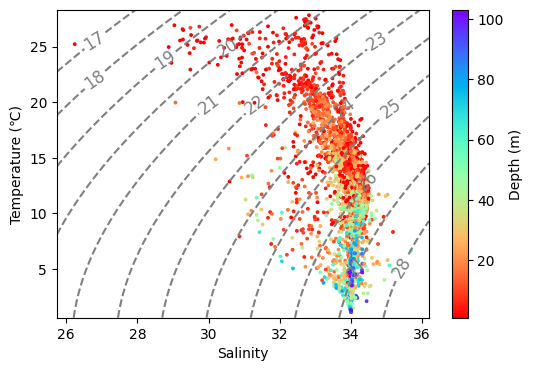

In [4]:
plt.figure(figsize=(6,4))

CS = plt.contour(Sg, Tg, density, linestyles='dashed', colors='grey', levels=np.arange(17,29,1))
plt.clabel(CS, fontsize=12, inline=1, fmt='%1.0f')

plt.scatter(df['염분'], df['수온(℃)'], c=df['수심(m)'], s=3, cmap='rainbow_r', marker='o')
plt.colorbar(label='Depth (m)')
plt.xlabel('Salinity')
plt.ylabel('Temperature (℃)')
plt.show()